# DSLabs functions

In [27]:
%run "scripts/dslabs_functions.py"


# Data functions

In [28]:
%run "scripts/data_functions.py"

import pandas as pd
import numpy as np



data_functions lodaded


# Load

In [131]:
test_data=False
# test_data=False


file_tag = "Gira Bike"


train=pd.read_csv(f"data/df_gira_agg_2h_final_train.csv", decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)
test=pd.read_csv(f"data/df_gira_agg_2h_final_test.csv", decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)
target='target_station_load_rate'
# Se os dados já tiverem a frequência correta para cada dia (com todas as horas), 
# podemos apenas ajustar o índice para começar no horário correto.
#
#train.index = pd.date_range(start='2022-01-01 14:00', periods=len(train), freq='2H')
#test.index = pd.date_range(start='2023-02-14 16:00', periods=len(test), freq='2H')



test_split_threshold=0.9
# Prepare the training and testing data from dataframes with features and target
trnX = train.drop(columns=[target])
trnY = train[target]
tstX = test.drop(columns=[target])
tstY = test[target]


from numpy import arange

# Ensure no data leakage
assert not set(train.index).intersection(set(test.index)), "Data leakage detected: Train and test sets overlap."


train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4878 entries, 2022-01-01 14:00:00 to 2023-02-14 14:00:00
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               4878 non-null   float64
 1   rain_mm                                                      4878 non-null   float64
 2   wmo_weather_code                                             4878 non-null   float64
 3   wind_speed_10m                                               4878 non-null   float64
 4   is_holiday_lisbon                                            4878 non-null   float64
 5   target_station_status                                        4878 non-null   float64
 6   target_station_load_rate                                     4878 non-null   float64
 7   station_load_rate_ Rua do Arco Cego / Av. 

In [115]:
train.tail()

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-02-14 06:00:00,-0.057250,0.0,0.118018,0.080243,0.0,0.0,0.121602,-0.380399,-0.158129,-0.266006,0.362168,0.000000
2023-02-14 08:00:00,0.229002,0.0,-0.118018,0.320973,0.0,0.0,-0.170243,-1.053412,-2.388157,-1.152692,-0.195766,0.612268
2023-02-14 10:00:00,0.629755,0.0,0.000000,0.353071,0.0,0.0,-0.012160,-1.028331,0.093256,-0.414969,-0.166401,-0.225022
2023-02-14 12:00:00,0.458004,0.0,0.000000,0.609849,0.0,0.0,0.060801,0.075244,0.072983,0.177337,0.332803,-0.225022
2023-02-14 14:00:00,0.305336,0.0,0.177028,-0.064195,0.0,0.0,-0.409394,1.095214,2.104335,-0.294380,0.464945,2.129856


In [114]:
test.head()

,temperature_2m,rain_mm,wmo_weather_code,wind_speed_10m,is_holiday_lisbon,target_station_status,target_station_load_rate,station_load_rate_ Rua do Arco Cego / Av. Magalhães Lima,station_load_rate_ Av. Rovisco Pais / Av. Manuel da Maia,station_load_rate_ Praça de Londres,station_load_rate_ Av. Duque de Ávila / Jardim Arco Do Cego,station_load_rate_ Av. Barbosa Du Bocage / Rua Arco do Cego
date,,,,,,,,,,,,
2023-02-14 16:00:00,-0.057250,0.000000,0.000000,0.000000,0.0,0.0,-0.036481,0.275894,-1.613729,0.060295,-0.107671,1.208837
2023-02-14 18:00:00,-0.248085,0.000000,0.000000,-0.304925,0.0,0.0,-0.162136,0.000000,-0.016218,1.181066,-1.331211,-1.669346
2023-02-14 20:00:00,-0.381670,2.302924,2.950462,0.320973,0.0,0.0,0.068908,0.238272,0.774428,0.219898,0.553040,-0.062797
2023-02-14 22:00:00,-0.019083,-0.460585,0.000000,0.032097,0.0,0.0,-0.109442,0.957267,0.563589,0.489451,-0.308332,-0.068030
2023-02-15 00:00:00,-0.038167,2.302924,0.472074,-0.320973,0.0,0.0,-0.283739,0.267533,-0.056764,-0.425609,0.254496,-0.287818


# ARIMA Univariate

## ARIMA Study

In [132]:
from matplotlib.pyplot import figure, savefig, subplots
import warnings
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart
from pandas import Series
from numpy import isfinite
from matplotlib.pyplot import savefig
from statsmodels.tsa.arima.model import ARIMA



def arima_uni_study(train: Series, test: Series, measure: str = "R2", freq: str = None):
    # Ensure data does not contain NaN or infinite values
    train = train[isfinite(train)]
    test = test[isfinite(test)]

    # Set frequency if provided
    if freq:
        train = train.asfreq(freq)
        test = test.asfreq(freq)

    d_values = (0, 1, 2)
    p_params = (1,5,7)
    q_params = (1,5,7)

    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "ARIMA", "metric": measure, "params": ()}
    best_performance: float = -100000

    fig, axs = subplots(1, len(d_values), figsize=(len(d_values) * HEIGHT, HEIGHT))
    fig.suptitle(f"{file_tag} ARIMA Study", fontsize=16)  # Add subtitle over the charts      
    for i in range(len(d_values)):
        d: int = d_values[i]
        values = {}
        for q in q_params:
            yvalues = []
            for p in p_params:
                try:
                    arima = ARIMA(train, order=(p, d, q))
                    model = arima.fit(method_kwargs={"maxiter": 100})  # Increase the number of iterations
                    prd_tst = model.forecast(steps=len(test), signal_only=False)
                    eval: float = FORECAST_MEASURES[measure](test, prd_tst)
                    # print(f"ARIMA ({p}, {d}, {q})", eval)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (p, d, q)
                        best_model = model
                    yvalues.append(eval)
                except Exception as e:
                    print(f"ARIMA ({p}, {d}, {q}) failed: {e}")
                    yvalues.append(None)
            values[q] = yvalues
        plot_multiline_chart(
            p_params, values, ax=axs[i], title=f"ARIMA d={d} ({measure})", xlabel="p", ylabel=measure, percentage=flag
        )
    print(
        f"ARIMA best results achieved with (p,d,q)=({best_params['params'][0]:.0f}, {best_params['params'][1]:.0f}, {best_params['params'][2]:.0f}) ==> measure={best_performance:.2f}"
    )

    return best_model, best_params


# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
# warnings.filterwarnings("ignore", category=ConvergenceWarning, module="statsmodels")


ARIMA (5, 1, 5) failed: LU decomposition error.
ARIMA best results achieved with (p,d,q)=(5, 0, 7) ==> measure=0.02


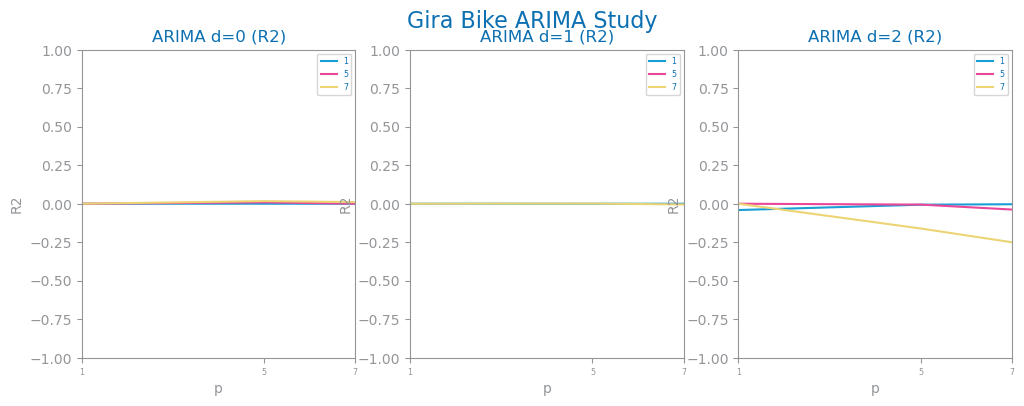

In [133]:


measure = 'R2'

best_model, best_params = arima_uni_study(trnY, trnY, measure=measure)#, freq = '2H')
savefig(f"images/{file_tag}_arima_univariate_{measure}_study.png")

## ARIMA Model Creation

In [134]:
from statsmodels.tsa.arima.model import ARIMA

best_params["params"]

predictor = ARIMA(endog=trnY, order=(best_params["params"][0], best_params["params"][1], best_params["params"][2]))
model = predictor.fit()
print(model.summary())


                                  SARIMAX Results                                   
Dep. Variable:     target_station_load_rate   No. Observations:                 4878
Model:                       ARIMA(5, 0, 7)   Log Likelihood               -4635.665
Date:                      Sun, 23 Mar 2025   AIC                           9299.331
Time:                              19:38:23   BIC                           9390.226
Sample:                                   0   HQIC                          9331.228
                                     - 4878                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.062e-05      0.001     -0.054      0.957      -0.003       0.003
ar.L1          0.9140      0.072     12.686      0.000       0.773       1.055
ar.L

### Model creation with ext cols lag 1 and lag 12

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

file_tag = "Gira Bike"

# Carregar os dados
train = pd.read_csv(f"data/df_gira_agg_2h_final_train.csv", decimal=".", index_col='date', parse_dates=True)
test = pd.read_csv(f"data/df_gira_agg_2h_final_test.csv", decimal=".", index_col='date', parse_dates=True)

target = 'target_station_load_rate'

# Garantir que não há fuga de dados entre treino e teste
assert not set(train.index).intersection(set(test.index)), "Data leakage detected: Train and test sets overlap."

# Criar variáveis de lag apenas para os lags 1 e 12
for lag in [1, 12]:
    train[f"lag_{lag}"] = train[target].shift(lag)
    test[f"lag_{lag}"] = test[target].shift(lag)

# Remover valores NaN gerados pelos shifts
train = train.dropna()
test = test.dropna()

# Separar variáveis independentes (X) e dependente (Y)
trnX = train[["lag_1", "lag_12"]]  # Apenas os lags desejados
trnY = train[target]
tstX = test[["lag_1", "lag_12"]]
tstY = test[target]

# Criar e treinar o modelo ARIMA usando apenas os lags 1 e 12
predictor = ARIMA(endog=trnY, order=(0, 1, 0), exog=trnX)  # Sem lags internos
model = predictor.fit()

print(model.summary())


In [ ]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))
prd_tst.index = test.index

plot_single_model_evaluation(
    trnY, tstY, prd_trn, prd_tst, title=f"{file_tag} - Univariate ARIMA Evaluate (p={params[0]}, d={params[1]}, q={params[2]})"
)
savefig(f"images/{file_tag}_arima_{measure}_univariate_eval.png")

### ARIMA Model results analysis

Key Findings from the ARIMA Model Summary

- AR (AutoRegressive) Terms:
    - Significant lags: L1 (0.9140), L3 (0.6707), L4 (-0.8300)
    - The strongest positive influence comes from L1 (0.9140) and L3 (0.6707).
    - L4 (-0.8300) has a strong negative impact.

- MA (Moving Average) Terms:
    - Significant lags: L1 (-1.1199), L3 (-0.7191), L4 (0.8788), L7 (-0.2174)
    - L1 (-1.1199) is the most influential (in a negative way), indicating strong correction of past errors.
    - L4 (0.8788) also contributes significantly.

- Constant Term:
    - Close to zero (-7.062e-05), meaning no strong long-term trend in the data.

- Error Variance (sigma²):
    - 0.3897, indicating moderate variability in residuals.

- Model Performance Indicators
    - Log Likelihood: -4635.665
    - AIC (Akaike Information Criterion): 9299.331 (lower is better)
    - BIC (Bayesian Information Criterion): 9390.226 (lower is better)

- Conclusion
    - Lag 1 (AR1 & MA1) has the strongest impact on predictions, with high coefficients in both AR and MA terms.
    - Lags 3 and 4 also play a significant role, showing that past values at these steps influence the current forecast.
    - The model captures strong autoregressive and moving average effects, suggesting a mix of short-term dependencies and error corrections.

## ARIMA Model Plot Diagnostics

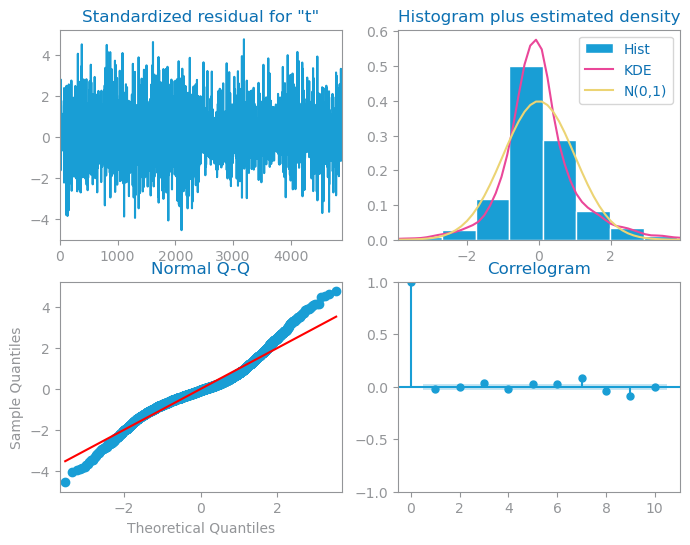

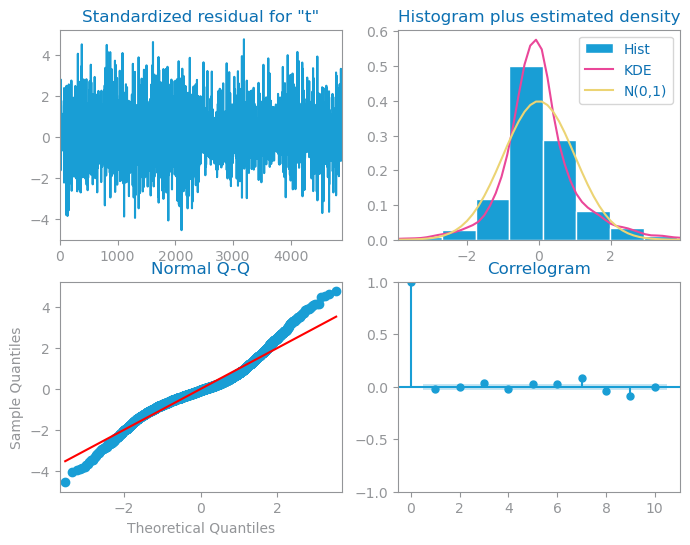

In [135]:
model.plot_diagnostics(figsize=(2 * HEIGHT, 1.5 * HEIGHT))


## ARIMA Evaluate

In [136]:

def plot_single_model_evaluation(train: Series, test: Series, prd_train: Series, prd_test: Series, title: str = ""):
    # Calculate performance metrics
    metrics = {
        "MAE": [
            mean_absolute_error(train, prd_train),
            mean_absolute_error(test, prd_test),
        ],
        "MSE": [
            mean_squared_error(train, prd_train),
            mean_squared_error(test, prd_test),
        ],
        "RMSE": [
            mean_squared_error(train, prd_train, squared=False),
            mean_squared_error(test, prd_test, squared=False),
        ],
        "R²": [
            r2_score(train, prd_train),
            r2_score(test, prd_test),
        ]
    }

    # Create a DataFrame from the metrics dictionary
    performance_df = pd.DataFrame(metrics, index=["Train", "Test"]).T
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)
    
    # Plot scale-dependent errors
    scale_dependent_errors = ["MAE", "MSE", "RMSE"]
    scale_dependent_data = performance_df.loc[scale_dependent_errors]
    ax = axs[0]
    ax.set_title("Scale-dependent errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.2  # Adjusted bar width for more spacing
    index = np.arange(len(scale_dependent_data.columns))
    for i, metric in enumerate(scale_dependent_data.index):
        bars = ax.bar(index + i * bar_width * 1.5, scale_dependent_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(scale_dependent_data.columns)
    ax.legend()
    
    # Plot percentage errors
    percentage_errors = ["R²"]
    percentage_data = performance_df.loc[percentage_errors]
    ax = axs[1]
    ax.set_title("Percentage errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.35
    index = np.arange(len(percentage_data.columns))
    for i, metric in enumerate(percentage_data.index):
        bars = ax.bar(index + i * bar_width, percentage_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(percentage_data.columns)
    ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


def plot_performance_metrics(metrics: dict, title: str = ""):
    # Create a DataFrame from the metrics dictionary
    performance_df = pd.DataFrame(metrics)
    
    # Separate scale-dependent errors and percentage errors
    scale_dependent_errors = ["MAE", "MSE", "RMSE"]
    percentage_errors = ["R²"]
    
    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    fig.suptitle(title, fontsize=16)
    
    # Plot scale-dependent errors
    scale_dependent_data = performance_df[["Model"] + scale_dependent_errors].set_index("Model").T
    ax = axs[0]
    ax.set_title("Scale-dependent errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.2  # Adjusted bar width for more spacing
    index = np.arange(len(scale_dependent_data.columns))
    for i, metric in enumerate(scale_dependent_data.index):
        bars = ax.bar(index + i * bar_width * 1.5, scale_dependent_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(scale_dependent_data.columns)
    ax.legend()
    
    # Plot percentage errors
    percentage_data = performance_df[["Model"] + percentage_errors].set_index("Model").T
    ax = axs[1]
    ax.set_title("Percentage errors")
    ax.set_xlabel("Metrics")
    ax.set_ylabel("Values")
    bar_width = 0.35
    index = np.arange(len(percentage_data.columns))
    for i, metric in enumerate(percentage_data.index):
        bars = ax.bar(index + i * bar_width, percentage_data.loc[metric], bar_width, label=metric)
        ax.bar_label(bars, fmt='%.2f')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(percentage_data.columns)
    ax.legend()
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

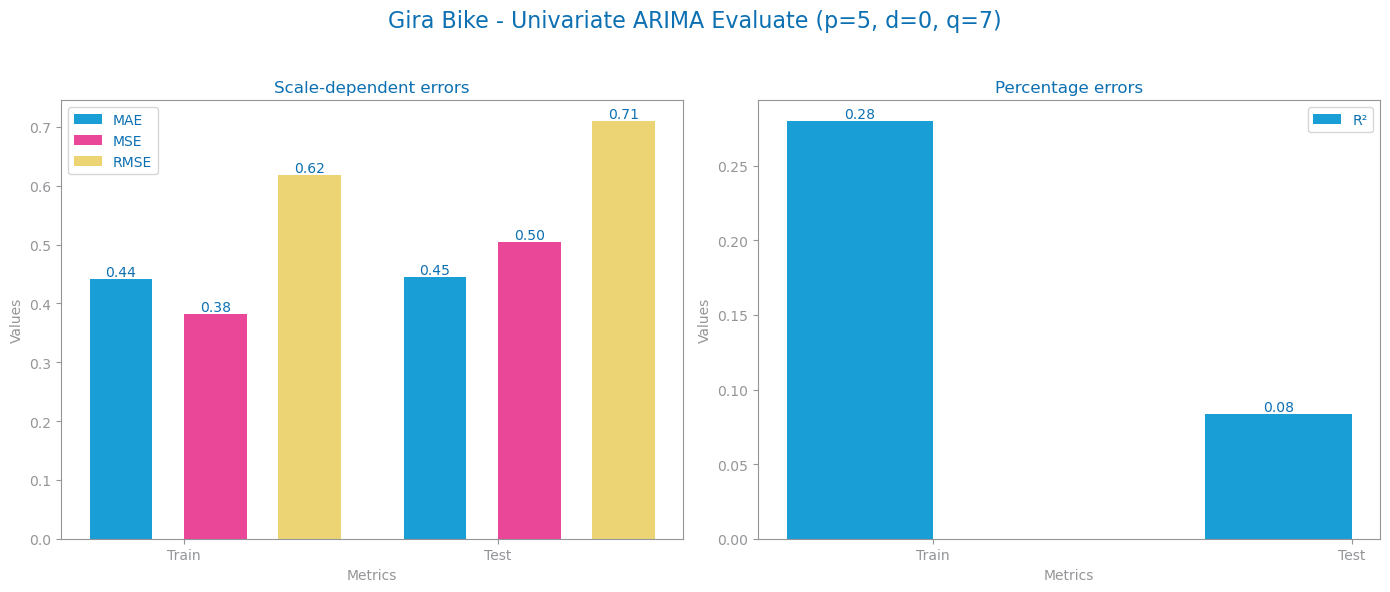

<Figure size 640x480 with 0 Axes>

In [137]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))
prd_tst.index = test.index

plot_single_model_evaluation(
    trnY, tstY, prd_trn, prd_tst, title=f"{file_tag} - Univariate ARIMA Evaluate (p={params[0]}, d={params[1]}, q={params[2]})"
)
savefig(f"images/{file_tag}_arima_{measure}_univariate_eval.png")

## ARIMA Plot

<Axes: xlabel='Date', ylabel='target_station_load_rate'>

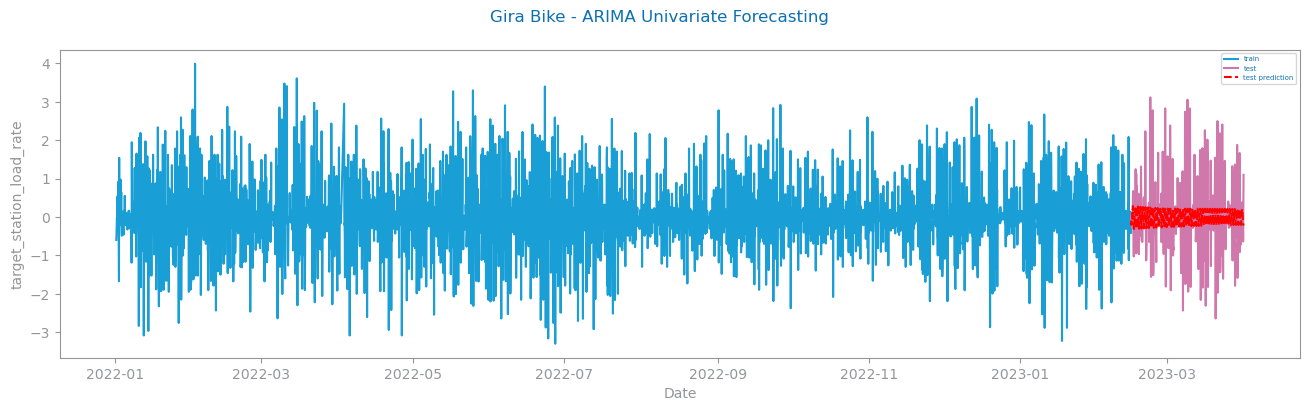

In [138]:
plot_forecasting_series(
    train[target],
    test[target],
    prd_tst,
    title=f"{file_tag} - ARIMA Univariate Forecasting",
    xlabel='Date',
    ylabel=target,
)

# SARIMA Univariate

## SARIMA study

In [145]:
import warnings

# Ignorar todos os avisos (warnings)
warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart
from pandas import Series
from numpy import isfinite
from matplotlib.pyplot import savefig, subplots
import sys
import os

# Redirecionar stdout e stderr para ignorar prints
sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

# Ignorar todos os warnings
warnings.filterwarnings("ignore")

def sarima_uni_study(train: Series, test: Series, measure: str = "R2", freq: str = None):
    # Ensure data does not contain NaN or infinite values
    train = train[isfinite(train)]
    test = test[isfinite(test)]

    if freq:
        train = train.asfreq(freq)
        test = test.asfreq(freq)

    d_values = (0, 1, 2)
    p_params = (1, 3, 5, 7)
    q_params = (1, 3, 5, 7)
    P_params = (0, 1, 2)
    D_values = (0, 1)
    Q_params = (0, 1, 2)
    s = 12  # Seasonal period (24h / 2h = 12)

    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params = {"name": "SARIMA", "metric": measure, "params": ()}
    best_performance = -100000

    fig, axs = subplots(1, len(d_values), figsize=(len(d_values) * 5, 5))
    fig.suptitle(f"SARIMA Study", fontsize=16)
    
    for i, d in enumerate(d_values):
        values = {}
        for q in q_params:
            for p in p_params:
                try:
                    sarima = SARIMAX(train, order=(p, d, q), seasonal_order=(P_params[0], D_values[0], Q_params[0], s))
                    model = sarima.fit(method_kwargs={"maxiter": 100})
                    prd_tst = model.forecast(steps=len(test))
                    eval_metric = FORECAST_MEASURES[measure](test, prd_tst)
                    
                    # Update the best model if the current one performs better
                    if eval_metric > best_performance and abs(eval_metric - best_performance) > DELTA_IMPROVE:
                        best_performance = eval_metric
                        best_params["params"] = (p, d, q, P_params[0], D_values[0], Q_params[0], s)
                        best_model = model
                    
                except Exception:
                    # Pass silently, no printing on errors
                    pass

    # Print the best results after the loop
    print(f"SARIMA best results: (p,d,q,P,D,Q,s)=({best_params['params']}) ==> measure={best_performance:.2f}")
    
    # Restoring the output to normal (console)
    sys.stdout = sys.__stdout__
    sys.stderr = sys.__stderr__

    return best_model, best_params


warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10263D+00    |proj g|=  3.48851D-02

At iterate    5    f=  1.10180D+00    |proj g|=  5.30532D-03

At iterate   10    f=  1.09556D+00    |proj g|=  6.11179D-02


 This problem is unconstrained.



At iterate   15    f=  1.03740D+00    |proj g|=  4.68339D-02

At iterate   20    f=  1.02905D+00    |proj g|=  1.64754D-02

At iterate   25    f=  1.02844D+00    |proj g|=  3.70431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     27     38      1     0     0   5.886D-06   1.028D+00
  F =   1.0284345906294154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09423D+00    |proj g|=  1.28736D-02


 This problem is unconstrained.



At iterate    5    f=  1.07771D+00    |proj g|=  1.39264D-01

At iterate   10    f=  1.03285D+00    |proj g|=  6.92269D-02

At iterate   15    f=  1.00541D+00    |proj g|=  1.23919D-02

At iterate   20    f=  1.00079D+00    |proj g|=  3.03947D-03

At iterate   25    f=  1.00073D+00    |proj g|=  5.17819D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     36      1     0     0   5.178D-06   1.001D+00
  F =   1.0007275385448118     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.


At iterate    5    f=  1.04673D+00    |proj g|=  1.65531D-01

At iterate   10    f=  9.99644D-01    |proj g|=  2.14740D-02

At iterate   15    f=  9.92794D-01    |proj g|=  1.27481D-02

At iterate   20    f=  9.91079D-01    |proj g|=  3.62064D-03

At iterate   25    f=  9.91057D-01    |proj g|=  9.26936D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     31      1     0     0   9.269D-06   9.911D-01
  F =  0.99105713492828273     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10


 This problem is unconstrained.



At iterate    5    f=  9.97644D-01    |proj g|=  1.27895D-01

At iterate   10    f=  9.78406D-01    |proj g|=  1.14122D-02

At iterate   15    f=  9.78017D-01    |proj g|=  7.89439D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     17     20      1     0     0   4.697D-06   9.780D-01
  F =  0.97801722358111276     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.


 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.39986D+00    |proj g|=  1.00759D+00

At iterate    5    f=  1.02643D+00    |proj g|=  6.25107D-02

At iterate   10    f=  1.01661D+00    |proj g|=  2.71723D-02

At iterate   15    f=  1.00875D+00    |proj g|=  1.70835D-02

At iterate   20    f=  1.00842D+00    |proj g|=  7.40713D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   2.940D-06   1.008D+00
  F =   1.0084153119561201     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B 

 This problem is unconstrained.



At iterate    5    f=  1.08005D+00    |proj g|=  1.02805D-01

At iterate   10    f=  1.01967D+00    |proj g|=  4.60060D-02

At iterate   15    f=  1.01506D+00    |proj g|=  3.80753D-02

At iterate   20    f=  1.01360D+00    |proj g|=  8.97977D-03

At iterate   25    f=  1.00469D+00    |proj g|=  3.97503D-02

At iterate   30    f=  1.00135D+00    |proj g|=  1.45021D-01

At iterate   35    f=  9.94979D-01    |proj g|=  1.18782D-02

At iterate   40    f=  9.94698D-01    |proj g|=  6.02877D-03

At iterate   45    f=  9.94670D-01    |proj g|=  2.12937D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     56   

 This problem is unconstrained.



At iterate   15    f=  9.93088D-01    |proj g|=  1.01097D-02

At iterate   20    f=  9.88339D-01    |proj g|=  2.60584D-02

At iterate   25    f=  9.86799D-01    |proj g|=  3.31911D-03

At iterate   30    f=  9.86562D-01    |proj g|=  1.58528D-02

At iterate   35    f=  9.84803D-01    |proj g|=  4.31706D-02

At iterate   40    f=  9.84332D-01    |proj g|=  6.31894D-03

At iterate   45    f=  9.83894D-01    |proj g|=  5.78383D-02

At iterate   50    f=  9.83193D-01    |proj g|=  3.63293D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     71      1     0     0   3.633D-02   9.832D-01
  F =  0.983193047896

 This problem is unconstrained.



At iterate    5    f=  1.01468D+00    |proj g|=  9.51283D-02

At iterate   10    f=  9.91682D-01    |proj g|=  2.78614D-02

At iterate   15    f=  9.89817D-01    |proj g|=  2.63527D-02

At iterate   20    f=  9.86407D-01    |proj g|=  1.89524D-02

At iterate   25    f=  9.85392D-01    |proj g|=  5.16366D-03

At iterate   30    f=  9.85314D-01    |proj g|=  4.40070D-03

At iterate   35    f=  9.84416D-01    |proj g|=  2.09936D-02

At iterate   40    f=  9.83446D-01    |proj g|=  4.45624D-02

At iterate   45    f=  9.82537D-01    |proj g|=  5.11012D-02

At iterate   50    f=  9.81091D-01    |proj g|=  5.50969D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.01877D+00    |proj g|=  8.08786D-02

At iterate   10    f=  9.97213D-01    |proj g|=  1.07984D-02

At iterate   15    f=  9.97059D-01    |proj g|=  5.57561D-04

At iterate   20    f=  9.96908D-01    |proj g|=  1.63287D-02

At iterate   25    f=  9.96842D-01    |proj g|=  8.44106D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     36      1     0     0   3.635D-05   9.968D-01
  F =  0.99684237423039690     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

 This problem is unconstrained.



At iterate    5    f=  9.99797D-01    |proj g|=  3.79496D-02

At iterate   10    f=  9.73772D-01    |proj g|=  3.20956D-02

At iterate   15    f=  9.71991D-01    |proj g|=  1.08527D-02

At iterate   20    f=  9.70639D-01    |proj g|=  1.74414D-02

At iterate   25    f=  9.68236D-01    |proj g|=  2.29493D-02

At iterate   30    f=  9.68092D-01    |proj g|=  7.39558D-03

At iterate   35    f=  9.68045D-01    |proj g|=  5.55290D-03

At iterate   40    f=  9.67308D-01    |proj g|=  1.75210D-02

At iterate   45    f=  9.65123D-01    |proj g|=  5.10672D-02

At iterate   50    f=  9.59126D-01    |proj g|=  3.37129D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03834D+00    |proj g|=  2.48939D-01

At iterate    5    f=  9.91741D-01    |proj g|=  1.68557D-02

At iterate   10    f=  9.74014D-01    |proj g|=  4.78596D-02

At iterate   15    f=  9.57942D-01    |proj g|=  2.47753D-02

At iterate   20    f=  9.53728D-01    |proj g|=  2.61665D-02

At iterate   25    f=  9.52867D-01    |proj g|=  6.92366D-03

At iterate   30    f=  9.52302D-01    |proj g|=  1.41586D-02

At iterate   35    f=  9.51957D-01    |proj g|=  2.45044D-02

At iterate   40    f=  9.51911D-01    |proj g|=  2.50276D-03

At iterate   45    f=  9.51366D-01    |proj g|=  3.03120D-02

At iterate   50    f=  9.50354D-01    |proj g|=  1.01147D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  9.57758D-01    |proj g|=  5.59929D-02

At iterate   10    f=  9.55846D-01    |proj g|=  1.03939D-02

At iterate   15    f=  9.54822D-01    |proj g|=  2.80330D-02

At iterate   20    f=  9.53801D-01    |proj g|=  1.45741D-02

At iterate   25    f=  9.51936D-01    |proj g|=  1.18237D-02

At iterate   30    f=  9.50465D-01    |proj g|=  2.44326D-02

At iterate   35    f=  9.49785D-01    |proj g|=  1.13133D-03

At iterate   40    f=  9.49774D-01    |proj g|=  8.48365D-04

At iterate   45    f=  9.49758D-01    |proj g|=  4.33129D-04

At iterate   50    f=  9.49757D-01    |proj g|=  4.00126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.96941D-01    |proj g|=  5.98904D-03

At iterate   10    f=  9.95527D-01    |proj g|=  4.70371D-03

At iterate   15    f=  9.95482D-01    |proj g|=  1.57894D-04

At iterate   20    f=  9.95481D-01    |proj g|=  7.74244D-04

At iterate   25    f=  9.95350D-01    |proj g|=  8.74510D-03

At iterate   30    f=  9.94534D-01    |proj g|=  1.73992D-03

At iterate   35    f=  9.94525D-01    |proj g|=  3.59380D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     36     39      1     0     0   8.744D-06   9.945D-01
  F =  0.99452500855801251     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f=  9.96207D-01    |proj g|=  2.76750D-02

At iterate   10    f=  9.89400D-01    |proj g|=  1.94323D-02

At iterate   15    f=  9.86595D-01    |proj g|=  6.21583D-02

At iterate   20    f=  9.71142D-01    |proj g|=  4.83065D-02

At iterate   25    f=  9.58311D-01    |proj g|=  8.73555D-02

At iterate   30    f=  9.50805D-01    |proj g|=  8.84356D-03

At iterate   35    f=  9.49137D-01    |proj g|=  7.74587D-03

At iterate   40    f=  9.49000D-01    |proj g|=  1.66406D-03

At iterate   45    f=  9.48954D-01    |proj g|=  1.55579D-03

At iterate   50    f=  9.48892D-01    |proj g|=  4.71878D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.75463D-01    |proj g|=  5.78440D-02

At iterate   10    f=  9.64965D-01    |proj g|=  6.77920D-02

At iterate   15    f=  9.57228D-01    |proj g|=  5.05655D-03

At iterate   20    f=  9.53747D-01    |proj g|=  3.72003D-02

At iterate   25    f=  9.50013D-01    |proj g|=  6.40312D-02

At iterate   30    f=  9.47407D-01    |proj g|=  4.96131D-02

At iterate   35    f=  9.45506D-01    |proj g|=  1.97557D-02

At iterate   40    f=  9.43224D-01    |proj g|=  5.22905D-02

At iterate   45    f=  9.40696D-01    |proj g|=  6.33928D-02

At iterate   50    f=  9.39406D-01    |proj g|=  2.96890D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  9.61420D-01    |proj g|=  2.95471D-02

At iterate   10    f=  9.57578D-01    |proj g|=  9.67654D-03

At iterate   15    f=  9.57162D-01    |proj g|=  1.56359D-02

At iterate   20    f=  9.55875D-01    |proj g|=  1.65118D-02

At iterate   25    f=  9.54434D-01    |proj g|=  9.88579D-03

At iterate   30    f=  9.50835D-01    |proj g|=  4.92607D-02

At iterate   35    f=  9.47221D-01    |proj g|=  6.85001D-02

At iterate   40    f=  9.42206D-01    |proj g|=  3.60413D-02

At iterate   45    f=  9.41637D-01    |proj g|=  1.60349D-02

At iterate   50    f=  9.41245D-01    |proj g|=  2.21678D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.13082D+00    |proj g|=  1.96779D-01

At iterate   10    f=  1.10629D+00    |proj g|=  6.06765D-03

At iterate   15    f=  1.10245D+00    |proj g|=  1.10302D-03

At iterate   20    f=  1.10190D+00    |proj g|=  1.04080D-03

At iterate   25    f=  1.10186D+00    |proj g|=  1.00181D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     29     36      1     0     0   2.140D-06   1.102D+00
  F =   1.1018516721869489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.22239D+00    |proj g|=  7.35904D-02

At iterate   10    f=  1.11969D+00    |proj g|=  6.44804D-02

At iterate   15    f=  1.09911D+00    |proj g|=  1.13157D-02

At iterate   20    f=  1.09526D+00    |proj g|=  4.30298D-03

At iterate   25    f=  1.09484D+00    |proj g|=  1.54118D-03

At iterate   30    f=  1.09480D+00    |proj g|=  5.19524D-04

At iterate   35    f=  1.09479D+00    |proj g|=  7.87965D-05

At iterate   40    f=  1.09479D+00    |proj g|=  1.48679D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     54      1     0     0   1.742D-05   1.095D+00
  F =   1.09479099212

 This problem is unconstrained.



At iterate    5    f=  1.19252D+00    |proj g|=  8.41041D-02

At iterate   10    f=  1.15956D+00    |proj g|=  1.53342D-01

At iterate   15    f=  1.07567D+00    |proj g|=  1.38045D-02

At iterate   20    f=  1.06688D+00    |proj g|=  1.89668D-02

At iterate   25    f=  1.06571D+00    |proj g|=  4.54809D-03

At iterate   30    f=  1.06554D+00    |proj g|=  9.71138D-04

At iterate   35    f=  1.06552D+00    |proj g|=  1.50589D-04

At iterate   40    f=  1.06552D+00    |proj g|=  3.59786D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     52      1     0     0   6.022D-05   1.066D+00
  F =   1.06552000161

 This problem is unconstrained.



At iterate    5    f=  1.17749D+00    |proj g|=  8.88827D-02

At iterate   10    f=  1.08844D+00    |proj g|=  7.29985D-02

At iterate   15    f=  1.05334D+00    |proj g|=  4.55533D-02

At iterate   20    f=  1.04530D+00    |proj g|=  1.15559D-02

At iterate   25    f=  1.04376D+00    |proj g|=  6.01224D-03

At iterate   30    f=  1.04347D+00    |proj g|=  1.06441D-03

At iterate   35    f=  1.04344D+00    |proj g|=  2.80727D-04

At iterate   40    f=  1.04343D+00    |proj g|=  2.19731D-04

At iterate   45    f=  1.04343D+00    |proj g|=  1.69892D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     61   

 This problem is unconstrained.



At iterate    5    f=  1.10735D+00    |proj g|=  1.91163D-02

At iterate   10    f=  1.10205D+00    |proj g|=  3.26422D-03

At iterate   15    f=  1.10168D+00    |proj g|=  1.93578D-03

At iterate   20    f=  1.10166D+00    |proj g|=  2.40664D-04

At iterate   25    f=  1.10166D+00    |proj g|=  7.53393D-05

At iterate   30    f=  1.10163D+00    |proj g|=  5.58113D-03

At iterate   35    f=  1.10136D+00    |proj g|=  2.99042D-02

At iterate   40    f=  1.06984D+00    |proj g|=  9.74726D-02

At iterate   45    f=  1.02079D+00    |proj g|=  3.33098D-02

At iterate   50    f=  1.01362D+00    |proj g|=  3.70967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50849D+00    |proj g|=  8.66555D-01

At iterate    5    f=  1.12112D+00    |proj g|=  1.72543D-01

At iterate   10    f=  1.10144D+00    |proj g|=  1.76021D-02

At iterate   15    f=  1.10042D+00    |proj g|=  2.59536D-02

At iterate   20    f=  1.09965D+00    |proj g|=  1.49551D-03

At iterate   25    f=  1.09919D+00    |proj g|=  7.44377D-03

At iterate   30    f=  1.09913D+00    |proj g|=  8.66128D-04

At iterate   35    f=  1.09899D+00    |proj g|=  4.26079D-03

At iterate   40    f=  1.09857D+00    |proj g|=  5.83095D-03

At iterate   45    f=  1.09854D+00    |proj g|=  5.61936D-04

At iterate   50    f=  1.04915D+00    |proj g|=  3.33139D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.11971D+00    |proj g|=  6.68038D-02

At iterate   10    f=  1.09003D+00    |proj g|=  7.87670D-03

At iterate   15    f=  1.07189D+00    |proj g|=  4.45785D-02

At iterate   20    f=  1.01603D+00    |proj g|=  6.40904D-02

At iterate   25    f=  1.00042D+00    |proj g|=  2.88026D-02

At iterate   30    f=  9.94557D-01    |proj g|=  2.55065D-02

At iterate   35    f=  9.93584D-01    |proj g|=  2.53714D-03

At iterate   40    f=  9.93397D-01    |proj g|=  1.15992D-02

At iterate   45    f=  9.92645D-01    |proj g|=  3.34439D-03

At iterate   50    f=  9.92549D-01    |proj g|=  1.62249D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.11828D+00    |proj g|=  7.90447D-02

At iterate   10    f=  1.06790D+00    |proj g|=  3.06386D-02

At iterate   15    f=  1.06409D+00    |proj g|=  5.17494D-03

At iterate   20    f=  1.06387D+00    |proj g|=  4.72178D-04

At iterate   25    f=  1.06385D+00    |proj g|=  2.96454D-03

At iterate   30    f=  1.06353D+00    |proj g|=  1.19745D-02

At iterate   35    f=  1.06302D+00    |proj g|=  1.10375D-02

At iterate   40    f=  1.06262D+00    |proj g|=  7.65699D-03

At iterate   45    f=  1.06248D+00    |proj g|=  2.39604D-04

At iterate   50    f=  1.06248D+00    |proj g|=  1.07126D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45229D+00    |proj g|=  1.21313D+00

At iterate    5    f=  1.13135D+00    |proj g|=  4.63886D-02

At iterate   10    f=  1.07004D+00    |proj g|=  6.00845D-02

At iterate   15    f=  1.04827D+00    |proj g|=  9.48447D-02

At iterate   20    f=  1.04323D+00    |proj g|=  1.53026D-03

At iterate   25    f=  1.04307D+00    |proj g|=  5.29961D-03

At iterate   30    f=  1.04203D+00    |proj g|=  1.78095D-03

At iterate   35    f=  1.04198D+00    |proj g|=  5.91165D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.11131D+00    |proj g|=  4.57330D-02

At iterate   10    f=  1.09626D+00    |proj g|=  5.16316D-02

At iterate   15    f=  1.09281D+00    |proj g|=  1.45992D-02

At iterate   20    f=  1.09088D+00    |proj g|=  1.14525D-02

At iterate   25    f=  1.08847D+00    |proj g|=  1.68680D-01

At iterate   30    f=  1.08695D+00    |proj g|=  3.10127D-02

At iterate   35    f=  1.08644D+00    |proj g|=  1.50397D-01

At iterate   40    f=  1.08617D+00    |proj g|=  1.89241D-02

At iterate   45    f=  1.08603D+00    |proj g|=  3.03446D-02

At iterate   50    f=  1.08597D+00    |proj g|=  5.52264D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.11147D+00    |proj g|=  5.93932D-02

At iterate   10    f=  1.09970D+00    |proj g|=  1.27708D-02

At iterate   15    f=  1.09665D+00    |proj g|=  1.10507D-02

At iterate   20    f=  1.09109D+00    |proj g|=  5.07685D-02



 Nonpositive definiteness in Cholesky factorization in formk;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f=  8.84792D-04    |proj g|=  1.77120D+05
  ys=-4.639E-03  -gs= 5.055E-01 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67159D+00    |proj g|=  2.01565D+00

At iterate    5    f=  1.10347D+00    |proj g|=  6.18970D-02

At iterate   10    f=  1.08292D+00    |proj g|=  6.87522D-03

At iterate   15    f=  1.07968D+00    |proj g|=  2.31946D-02

At iterate   20    f=  1.07821D+00    |proj g|=  1.05717D-02

At iterate   25    f=  1.07723D+00    |proj g|=  1.63519D-02

At iterate   30    f=  1.04657D+00    |proj g|=  2.30626D-01

At iterate   35    f=  9.85546D-01    |proj g|=  9.76541D-02

At iterate   40    f=  9.70342D-01    |proj g|=  7.48135D-02

At iterate   45    f=  9.66649D-01    |proj g|=  2.42187D-02

At iterate   50    f=  9.65147D-01    |proj g|=  8.31060D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65548D+00    |proj g|=  1.65398D+00

At iterate    5    f=  1.15215D+00    |proj g|=  1.29928D-01

At iterate   10    f=  1.03512D+00    |proj g|=  2.86666D-02

At iterate   15    f=  1.00617D+00    |proj g|=  2.03634D-02

At iterate   20    f=  9.99847D-01    |proj g|=  2.91948D-02

At iterate   25    f=  9.99087D-01    |proj g|=  1.35895D-03

At iterate   30    f=  9.98581D-01    |proj g|=  4.92093D-03

At iterate   35    f=  9.98413D-01    |proj g|=  6.57905D-03

At iterate   40    f=  9.98398D-01    |proj g|=  1.85337D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73077D+00    |proj g|=  1.89656D+00

At iterate    5    f=  1.14242D+00    |proj g|=  2.30182D-01

At iterate   10    f=  1.06694D+00    |proj g|=  1.78803D-01

At iterate   15    f=  1.03240D+00    |proj g|=  3.53466D-02

At iterate   20    f=  1.02950D+00    |proj g|=  3.01695D-02

At iterate   25    f=  1.02882D+00    |proj g|=  9.74654D-03

At iterate   30    f=  1.02631D+00    |proj g|=  1.12798D-02

At iterate   35    f=  1.02498D+00    |proj g|=  1.73379D-02

At iterate   40    f=  1.02466D+00    |proj g|=  3.68940D-03

At iterate   45    f=  1.02460D+00    |proj g|=  1.36684D-03

At iterate   50    f=  1.02447D+00    |proj g|=  2.15168D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy po

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.15092D+00    |proj g|=  3.26513D+00

At iterate    5    f=  1.12316D+00    |proj g|=  9.23214D-02

At iterate   10    f=  1.08914D+00    |proj g|=  3.84272D-02

At iterate   15    f=  1.07928D+00    |proj g|=  3.14723D-02

At iterate   20    f=  1.07809D+00    |proj g|=  3.81835D-02

At iterate   25    f=  1.07218D+00    |proj g|=  4.54873D-02

At iterate   30    f=  1.07056D+00    |proj g|=  1.25985D-02

At iterate   35    f=  1.06923D+00    |proj g|=  3.82685D-02

At iterate   40    f=  1.06553D+00    |proj g|=  9.46546D-02

At iterate   45    f=  1.06310D+00    |proj g|=  3.53554D-02

At iterate   50    f=  1.06263D+00    |proj g|=  1.22682D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.12768D+00    |proj g|=  3.66460D-01

At iterate   10    f=  1.08729D+00    |proj g|=  8.08004D-02

At iterate   15    f=  1.08186D+00    |proj g|=  5.37735D-02

At iterate   20    f=  1.07600D+00    |proj g|=  2.44856D-01

At iterate   25    f=  1.06914D+00    |proj g|=  7.95072D-02

At iterate   30    f=  1.06766D+00    |proj g|=  1.18499D-02

At iterate   35    f=  1.06639D+00    |proj g|=  5.39175D-02

At iterate   40    f=  1.06544D+00    |proj g|=  5.86861D-02

At iterate   45    f=  1.06439D+00    |proj g|=  2.08223D-01

At iterate   50    f=  1.06382D+00    |proj g|=  4.26472D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.41384D+00    |proj g|=  1.85141D-01

At iterate    5    f=  1.36319D+00    |proj g|=  5.84394D-02

At iterate   10    f=  1.33146D+00    |proj g|=  6.79175D-03

At iterate   15    f=  1.32725D+00    |proj g|=  1.30705D-03

At iterate   20    f=  1.32655D+00    |proj g|=  1.49016D-03

At iterate   25    f=  1.32648D+00    |proj g|=  7.94833D-04

At iterate   30    f=  1.32647D+00    |proj g|=  9.69703D-05

At iterate   35    f=  1.32647D+00    |proj g|=  5.71303D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  1.26305D+00    |proj g|=  1.22832D-02

At iterate   15    f=  1.25853D+00    |proj g|=  3.54544D-03

At iterate   20    f=  1.25803D+00    |proj g|=  2.23102D-03

At iterate   25    f=  1.25797D+00    |proj g|=  5.76729D-04

At iterate   30    f=  1.25797D+00    |proj g|=  3.56861D-04

At iterate   35    f=  1.25797D+00    |proj g|=  3.01495D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     46      1     0     0   3.386D-05   1.258D+00
  F =   1.2579655420298710     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.30102D+00    |proj g|=  2.15798D-01

At iterate   10    f=  1.23425D+00    |proj g|=  3.69564D-02

At iterate   15    f=  1.22871D+00    |proj g|=  4.10319D-02

At iterate   20    f=  1.21464D+00    |proj g|=  1.24335D-02

At iterate   25    f=  1.21193D+00    |proj g|=  4.58115D-03

At iterate   30    f=  1.21162D+00    |proj g|=  1.45950D-03

At iterate   35    f=  1.21160D+00    |proj g|=  4.80772D-04

At iterate   40    f=  1.21160D+00    |proj g|=  4.64730D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     50      1     0     0   1.206D-04   1.212D+00
  F =   1.21159639621

 This problem is unconstrained.



At iterate    5    f=  1.30966D+00    |proj g|=  1.22170D-01

At iterate   10    f=  1.25669D+00    |proj g|=  1.22942D-01

At iterate   15    f=  1.20711D+00    |proj g|=  1.63771D-02

At iterate   20    f=  1.20123D+00    |proj g|=  5.59116D-03

At iterate   25    f=  1.20057D+00    |proj g|=  9.72971D-04

At iterate   30    f=  1.20050D+00    |proj g|=  1.70766D-03

At iterate   35    f=  1.20049D+00    |proj g|=  9.16252D-04

At iterate   40    f=  1.20049D+00    |proj g|=  1.59576D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     44     63      1     0     0   1.678D-04   1.200D+00
  F =   1.20048552409


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29471D+00    |proj g|=  1.79233D-01

At iterate    5    f=  1.18539D+00    |proj g|=  2.35537D-02

At iterate   10    f=  1.12017D+00    |proj g|=  1.28715D-01

At iterate   15    f=  1.10739D+00    |proj g|=  4.23651D-03

At iterate   20    f=  1.10444D+00    |proj g|=  4.21887D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     55      2     0     0   1.650D-04   1.104D+00
  F =   1.1044377999119339     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61014D+00    |proj g|=  5.89173D-01

At iterate    5    f=  1.33882D+00    |proj g|=  9.49348D-02

At iterate   10    f=  1.29793D+00    |proj g|=  1.42987D-02

At iterate   15    f=  1.24417D+00    |proj g|=  1.95406D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     28     44      1     0     0   9.775D-03   1.100D+00
  F =   1.1003390849971584     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.27222D+00    |proj g|=  1.45526D-01

At iterate    5    f=  1.24119D+00    |proj g|=  4.93593D-03

At iterate   10    f=  1.23817D+00    |proj g|=  5.92644D-02

At iterate   15    f=  1.20854D+00    |proj g|=  2.10294D-01

At iter

 This problem is unconstrained.



At iterate    5    f=  1.30306D+00    |proj g|=  3.11028D-01

At iterate   10    f=  1.22681D+00    |proj g|=  5.48650D-02

At iterate   15    f=  1.20681D+00    |proj g|=  1.49055D-02

At iterate   20    f=  1.20593D+00    |proj g|=  5.02465D-04

At iterate   25    f=  1.20592D+00    |proj g|=  2.75022D-03

At iterate   30    f=  1.20560D+00    |proj g|=  8.43400D-03

At iterate   35    f=  1.20548D+00    |proj g|=  4.41037D-03

At iterate   40    f=  1.20547D+00    |proj g|=  1.85870D-04

At iterate   45    f=  1.20545D+00    |proj g|=  1.99666D-03

At iterate   50    f=  1.20538D+00    |proj g|=  1.10623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.32352D+00    |proj g|=  1.10063D-01

At iterate   10    f=  1.15465D+00    |proj g|=  1.13482D-01

At iterate   15    f=  1.10662D+00    |proj g|=  2.54296D-02

At iterate   20    f=  1.09825D+00    |proj g|=  3.64511D-03

At iterate   25    f=  1.09757D+00    |proj g|=  6.28552D-04

At iterate   30    f=  1.09753D+00    |proj g|=  3.47814D-03

At iterate   35    f=  1.09753D+00    |proj g|=  4.32055D-04

At iterate   40    f=  1.09753D+00    |proj g|=  3.88703D-04

At iterate   45    f=  1.09753D+00    |proj g|=  3.74819D-04

At iterate   50    f=  1.09752D+00    |proj g|=  1.55623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.28825D+00    |proj g|=  1.44145D-01

At iterate   10    f=  1.16168D+00    |proj g|=  1.18958D-01

At iterate   15    f=  1.10862D+00    |proj g|=  1.00404D-01

At iterate   20    f=  1.10653D+00    |proj g|=  5.47520D-03

At iterate   25    f=  1.10613D+00    |proj g|=  4.24559D-02

At iterate   30    f=  1.10443D+00    |proj g|=  1.36957D-02

At iterate   35    f=  1.10385D+00    |proj g|=  1.89394D-02

At iterate   40    f=  1.10372D+00    |proj g|=  7.09872D-03

At iterate   45    f=  1.10365D+00    |proj g|=  1.01196D-02

At iterate   50    f=  1.10362D+00    |proj g|=  5.26540D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.27633D+00    |proj g|=  2.16297D-01

At iterate   10    f=  1.21118D+00    |proj g|=  1.07013D-01

At iterate   15    f=  1.12864D+00    |proj g|=  1.90928D-01

At iterate   20    f=  1.11803D+00    |proj g|=  5.32391D-02

At iterate   25    f=  1.10895D+00    |proj g|=  3.11164D-02

At iterate   30    f=  1.10042D+00    |proj g|=  7.83260D-02

At iterate   35    f=  1.09668D+00    |proj g|=  3.51664D-01

At iterate   40    f=  1.09491D+00    |proj g|=  3.07211D-01

At iterate   45    f=  1.09356D+00    |proj g|=  3.86752D-01

At iterate   50    f=  1.09293D+00    |proj g|=  2.34352D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.28852D+00    |proj g|=  5.52271D-01

At iterate   10    f=  1.22328D+00    |proj g|=  3.86679D-02

At iterate   15    f=  1.18023D+00    |proj g|=  5.59554D-02

At iterate   20    f=  1.12350D+00    |proj g|=  2.10656D-01

At iterate   25    f=  1.09344D+00    |proj g|=  2.88236D-02

At iterate   30    f=  1.08464D+00    |proj g|=  2.97054D-02

At iterate   35    f=  1.08135D+00    |proj g|=  8.04247D-03

At iterate   40    f=  1.08069D+00    |proj g|=  1.15095D-02

At iterate   45    f=  1.08026D+00    |proj g|=  6.27987D-03

At iterate   50    f=  1.07996D+00    |proj g|=  7.81840D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.34920D+00    |proj g|=  1.27864D-01

At iterate   10    f=  1.13933D+00    |proj g|=  7.34097D-02

At iterate   15    f=  1.05681D+00    |proj g|=  3.14433D-02

At iterate   20    f=  1.03090D+00    |proj g|=  4.63108D-02
  ys=-3.171E-02  -gs= 1.064E-02 BFGS update SKIPPED

At iterate   25    f=  1.01775D+00    |proj g|=  1.20137D-01
  ys=-4.686E-02  -gs= 5.114E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f=  1.01325D+00    |proj g|=  1.39169D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f=  1.01324D+00    |proj g|=  2.42785D-02
  ys=-4.284E-13  -gs= 2.478E-12 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37    170      4     3     0   2.590D-02   1.013D+00
  F =   1.0132372911303551     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.92014D+00    |proj g|=  1.85831D+00

At iterate    5    f=  1.31859D+00    |proj g|=  1.68463D-01

At iterate   10    f=  1.14723D+00    |proj g|=  8.62151D-02

At iterate   15    f=  1.10280D+00    |proj g|=  8.85281D-02

At iterate   20    f=  1.09970D+00    |proj g|=  1.16376D-02

At iterate   25    f=  1.09908D+00    |proj g|=  3.70936D-02

At iterate   30    f=  1.09759D+00    |proj g|=  8.16252D-03

At iterate   35    f=  1.09744D+00    |proj g|=  1.71504D-03

At iterate   40    f=  1.09732D+00    |proj g|=  1.34940D-02

At iterate   45    f=  1.09721D+00    |proj g|=  7.08151D-03

At iterate   50    f=  1.09717D+00    |proj g|=  3.97148D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83088D+00    |proj g|=  1.91289D+00

At iterate    5    f=  1.34207D+00    |proj g|=  1.58122D-01

At iterate   10    f=  1.20316D+00    |proj g|=  1.10847D-01

At iterate   15    f=  1.11354D+00    |proj g|=  1.69401D-01

At iterate   20    f=  1.10880D+00    |proj g|=  5.14605D-02

At iterate   25    f=  1.10787D+00    |proj g|=  1.00196D-01

At iterate   30    f=  1.10712D+00    |proj g|=  4.28079D-03

At iterate   35    f=  1.10702D+00    |proj g|=  2.55407D-02

At iterate   40    f=  1.10687D+00    |proj g|=  4.82488D-03

At iterate   45    f=  1.10670D+00    |proj g|=  1.21677D-02

At iterate   50    f=  1.10516D+00    |proj g|=  4.66130D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.66156D+00    |proj g|=  1.53102D+00

At iterate    5    f=  1.25982D+00    |proj g|=  7.18526D-02

At iterate   10    f=  1.23525D+00    |proj g|=  5.74831D-02

At iterate   15    f=  1.21830D+00    |proj g|=  3.41028D-02

At iterate   20    f=  1.20225D+00    |proj g|=  1.25873D-01

At iterate   25    f=  1.13617D+00    |proj g|=  2.81383D-01

At iterate   30    f=  1.11991D+00    |proj g|=  1.45956D-01

At iterate   35    f=  1.10352D+00    |proj g|=  3.03536D-01

At iterate   40    f=  1.09509D+00    |proj g|=  5.88766D-01

At iterate   45    f=  1.09102D+00    |proj g|=  9.93168D-02

At iterate   50    f=  1.08790D+00    |proj g|=  1.65939D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

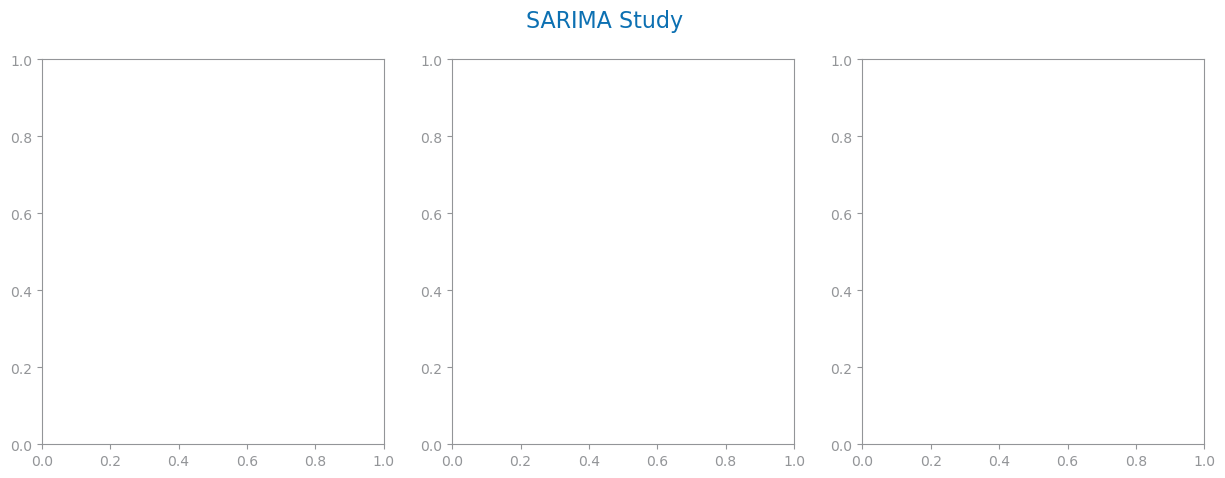

In [147]:
measure = 'R2'
best_model, best_params = sarima_uni_study(trnY, tstY, measure=measure)
savefig(f"images/{file_tag}_sarima_univariate_{measure}_study.png")

## SARIMA model creation

In [ ]:

# Fit final SARIMA model with best params
params = best_params["params"]
predictor = SARIMAX(trnY, order=(params[0], params[1], params[2]), seasonal_order=(params[3], params[4], params[5], params[6]))
model = predictor.fit()
print(model.summary())

## SARIMA diagnostics Plot

In [ ]:
# Diagnostics
model.plot_diagnostics(figsize=(10, 6))

## SARIMA Evaluate

In [ ]:
#
# Predictions
#prd_trn = model.predict(start=0, end=len(trnY) - 1)
#prd_tst = model.forecast(steps=len(tstY))
#prd_tst.index = tstY.index
#
#plot_single_model_evaluation(trnY, tstY, prd_trn, prd_tst, title=f"{file_tag} - Univariate SARIMA Evaluation (p,d,q,P,D,Q,s)=({params})")
#savefig(f"images/{file_tag}_sarima_{measure}_univariate_eval.png")

In [ ]:
from dslabs_functions import plot_forecasting_eval

params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)
prd_tst = best_model.forecast(steps=len(test))
prd_tst.index = test.index

plot_single_model_evaluation(
    trnY, tstY, prd_trn, prd_tst, title=f"{file_tag} - Univariate SARIMA Evaluate (p={params[0]}, d={params[1]}, q={params[2]})"
)
savefig(f"images/{file_tag}_arima_{measure}_univariate_eval.png")

## SARIMA Forecasting plot

In [ ]:
plot_forecasting_series(
    train[target],
    test[target],
    prd_tst,
    title=f"{file_tag} - SARIMA Univariate Forecasting",
    xlabel='Date',
    ylabel=target,
)

# ARIMA Multi Variate

## ARIMA Multivariate Study

In [125]:
test_data=False
# test_data=False


file_tag = "Gira Bike"


train=pd.read_csv(f"data/df_gira_agg_2h_final_train.csv", decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)
test=pd.read_csv(f"data/df_gira_agg_2h_final_test.csv", decimal=".",  index_col='date', parse_dates=True,  infer_datetime_format=True)
target='target_station_load_rate'
# Se os dados já tiverem a frequência correta para cada dia (com todas as horas), 
# podemos apenas ajustar o índice para começar no horário correto.
#
#train.index = pd.date_range(start='2022-01-01 14:00', periods=len(train), freq='2H')
#test.index = pd.date_range(start='2023-02-14 16:00', periods=len(test), freq='2H')



test_split_threshold=0.9
# Prepare the training and testing data from dataframes with features and target
trnX = train.drop(columns=[target])
trnY = train[target]
tstX = test.drop(columns=[target])
tstY = test[target]


from numpy import arange

# Ensure no data leakage
assert not set(train.index).intersection(set(test.index)), "Data leakage detected: Train and test sets overlap."


train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4878 entries, 2022-01-01 14:00:00 to 2023-02-14 14:00:00
Data columns (total 12 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   temperature_2m                                               4878 non-null   float64
 1   rain_mm                                                      4878 non-null   float64
 2   wmo_weather_code                                             4878 non-null   float64
 3   wind_speed_10m                                               4878 non-null   float64
 4   is_holiday_lisbon                                            4878 non-null   float64
 5   target_station_status                                        4878 non-null   float64
 6   target_station_load_rate                                     4878 non-null   float64
 7   station_load_rate_ Rua do Arco Cego / Av. 

ARIMA best results achieved with (p,d,q)=(5, 1, 5) ==> measure=0.23


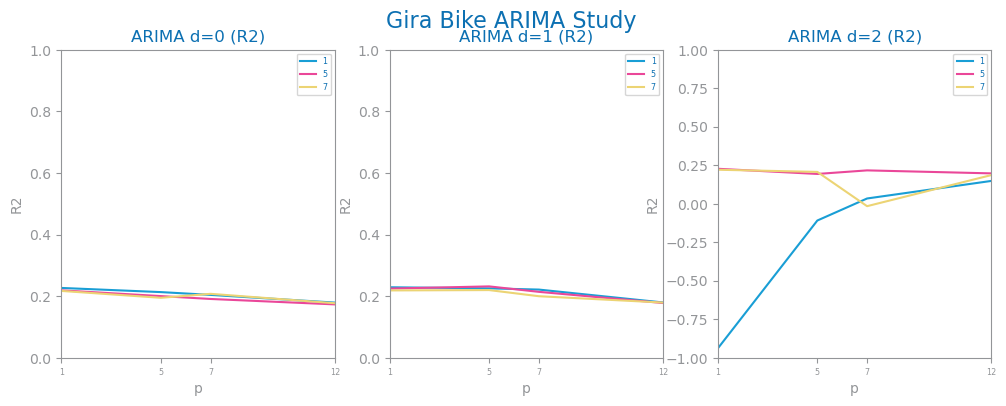

In [126]:
from matplotlib.pyplot import figure, savefig, subplots
from dslabs_functions import FORECAST_MEASURES, DELTA_IMPROVE, plot_multiline_chart
from pandas import DataFrame
from numpy import isfinite
from statsmodels.tsa.arima.model import ARIMA
import warnings

def arima_multi_study(train: DataFrame, test: DataFrame, target: str, measure: str = "R2",freq: str = None):
    # Ensure data does not contain NaN or infinite values
    train = train[isfinite(train).all(axis=1)]
    test = test[isfinite(test).all(axis=1)]

    # Set frequency if provided
    if freq:
        train = train.asfreq(freq)
        test = test.asfreq(freq)


    trnY = train.pop(target)
    tstY = test.pop(target)
    trnX = train
    tstX = test

    d_values = (0, 1, 2)
    p_params = (1, 5, 7,12)
    q_params = (1, 5, 7)

    flag = measure == "R2" or measure == "MAPE"
    best_model = None
    best_params: dict = {"name": "ARIMA", "metric": measure, "params": ()}
    best_performance: float = -100000

    fig, axs = subplots(1, len(d_values), figsize=(len(d_values) * HEIGHT, HEIGHT))
    fig.suptitle(f"{file_tag} ARIMA Study", fontsize=16)  # Add subtitle over the charts   
    for i in range(len(d_values)):
        d: int = d_values[i]
        values = {}
        for q in q_params:
            yvalues = []
            for p in p_params:
                try:
                    arima = ARIMA(endog=trnY, exog=trnX, order=(p, d, q))
                    model = arima.fit(method_kwargs={"maxiter": 50})  # Increase the number of iterations
                    prd_tst = model.forecast(steps=len(tstY), exog=tstX)
                    eval: float = FORECAST_MEASURES[measure](tstY, prd_tst)
                    # print(f"ARIMA ({p}, {d}, {q})", eval)
                    if eval > best_performance and abs(eval - best_performance) > DELTA_IMPROVE:
                        best_performance: float = eval
                        best_params["params"] = (p, d, q)
                        best_model = model
                    yvalues.append(eval)
                except Exception as e:
                    print(f"ARIMA ({p}, {d}, {q}) failed: {e}")
                    yvalues.append(None)
            values[q] = yvalues
        plot_multiline_chart(
            p_params, values, ax=axs[i], title=f"ARIMA d={d} ({measure})", xlabel="p", ylabel=measure, percentage=flag
        )
    print(
        f"ARIMA best results achieved with (p,d,q)=({best_params['params'][0]:.0f}, {best_params['params'][1]:.0f}, {best_params['params'][2]:.0f}) ==> measure={best_performance:.2f}"
    )

    return best_model, best_params

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")


In [ ]:

measure='R2'

best_model, best_params = arima_multi_study(train, test, target=target, measure=measure, freq=None)
savefig(f"images/{file_tag}_arima_multivariate_{measure}_study.png")

## ARIMA Multivariate Model

In [23]:
from statsmodels.tsa.arima.model import ARIMA

best_params["params"]

predictor = ARIMA(endog=trnY, exog=trnX, order=(best_params["params"][0], best_params["params"][1], best_params["params"][2]))
model = predictor.fit()
print(model.summary())

                                  SARIMAX Results                                   
Dep. Variable:     target_station_load_rate   No. Observations:                 4878
Model:                       ARIMA(5, 1, 5)   Log Likelihood               -4688.122
Date:                      Sun, 23 Mar 2025   AIC                           9420.245
Time:                              16:00:02   BIC                           9563.075
Sample:                                   0   HQIC                          9470.368
                                     - 4878                                         
Covariance Type:                        opg                                         
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
temperature_2m                                                  

## ARIMA Multivariate Plot Diagnostics

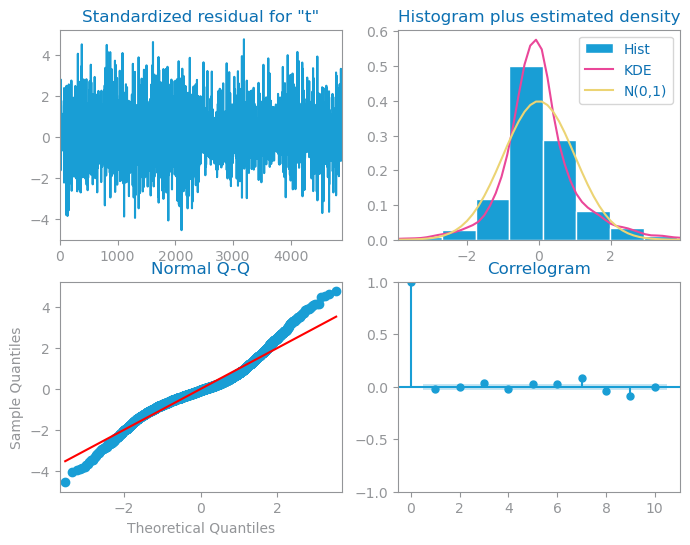

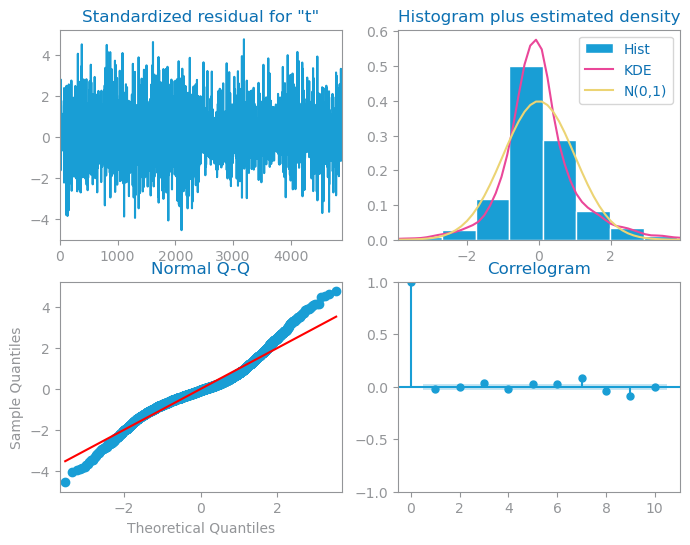

In [127]:
model.plot_diagnostics(figsize=(2 * HEIGHT, 1.5 * HEIGHT))


## ARIMA Multivariate Evaluate

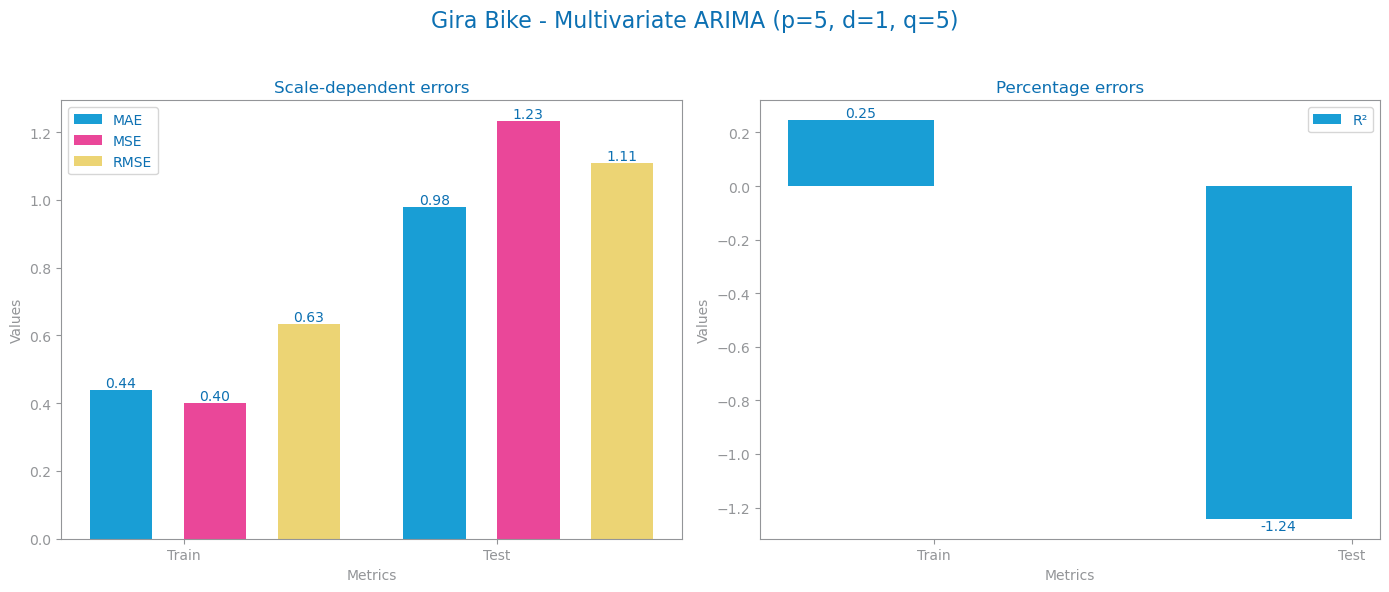

<Figure size 640x480 with 0 Axes>

In [128]:
from dslabs_functions import plot_forecasting_eval


params = best_params["params"]
prd_trn = best_model.predict(start=0, end=len(train) - 1)


# Use the last available exogenous variables from the training set for forecasting
last_exog = trnX.iloc[-1].values.reshape(1, -1)
exog_forecast = np.repeat(last_exog, len(test), axis=0)


prd_tst = best_model.forecast(steps=len(test), exog=exog_forecast)
prd_tst.index = test.index

plot_single_model_evaluation(
    trnY, tstY, prd_trn, prd_tst, title=f"{file_tag} - Multivariate ARIMA (p={params[0]}, d={params[1]}, q={params[2]})"
)
savefig(f"images/{file_tag}_arima_{measure}_multivariate_eval.png")

## ARIMA Multivariate Plot

<Axes: xlabel='Date', ylabel='target_station_load_rate'>

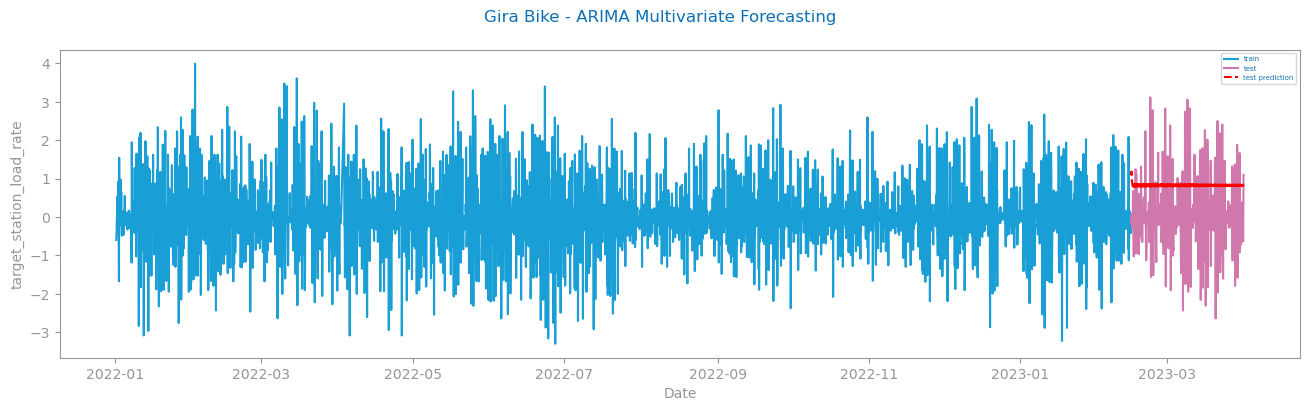

In [129]:
plot_forecasting_series(
    train[target],
    test[target],
    prd_tst,
    title=f"{file_tag} - ARIMA Multivariate Forecasting",
    xlabel='Date',
    ylabel=target,
)

# TO DO:


    - É necessário definir FREQ? eu neste momento não estou a definir frequencia
    - No ARIMA univariate plot o prediction está outra vez a fazer em 1985, tenho que ver o que está a causar isto

-